<a href="https://colab.research.google.com/github/Shreesha486/CODSOFT/blob/main/ecommerce_customer_order_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
upload=files.upload()

Saving ecommerce_customer_orders.csv to ecommerce_customer_orders.csv


In [3]:
import pandas as pd
df=pd.read_csv('ecommerce_customer_orders.csv')
df.head()


,OrderID,CustomerID,OrderDate,ProductCategory,ProductName,Quantity,Price,PaymentMethod,Region,OrderStatus,TotalAmount
0,O1000,C427,2023-08-21,Sports,Football,3,4061,Card,North,Returned,12183
1,O1001,C157,2024-01-05,Electronics,Smartwatch,4,4145,UPI,North,Returned,16580
2,O1002,C112,2023-07-03,Electronics,Smartwatch,1,1597,Cash on Delivery,West,Cancelled,1597
3,O1003,C479,2023-11-06,Sports,Tennis Racket,2,1997,UPI,South,Cancelled,3994
4,O1004,C240,2023-01-15,Sports,Football,2,3565,Card,East,Cancelled,7130


In [4]:
df.info()
df.isnull().sum()
df=df.drop_duplicates()
df.columns=df.columns.str.lower()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   OrderID          1000 non-null   object
 1   CustomerID       1000 non-null   object
 2   OrderDate        1000 non-null   object
 3   ProductCategory  1000 non-null   object
 4   ProductName      1000 non-null   object
 5   Quantity         1000 non-null   int64 
 6   Price            1000 non-null   int64 
 7   PaymentMethod    1000 non-null   object
 8   Region           1000 non-null   object
 9   OrderStatus      1000 non-null   object
 10  TotalAmount      1000 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 86.1+ KB


,orderid,customerid,orderdate,productcategory,productname,quantity,price,paymentmethod,region,orderstatus,totalamount
0,O1000,C427,2023-08-21,Sports,Football,3,4061,Card,North,Returned,12183
1,O1001,C157,2024-01-05,Electronics,Smartwatch,4,4145,UPI,North,Returned,16580
2,O1002,C112,2023-07-03,Electronics,Smartwatch,1,1597,Cash on Delivery,West,Cancelled,1597
3,O1003,C479,2023-11-06,Sports,Tennis Racket,2,1997,UPI,South,Cancelled,3994
4,O1004,C240,2023-01-15,Sports,Football,2,3565,Card,East,Cancelled,7130


In [5]:
total_customers=df['customerid'].nunique()
print("Total Customers: ",total_customers)
total_orders=df['orderid'].count()
print("Total orders: ",total_orders)
total_amount=df['totalamount'].sum()
print("Total amount: ",total_amount)
total_amount_received=df[df['orderstatus']=='Delivered']['totalamount'].sum()
print("Total amount received: ",total_amount_received)
avg_order_value=total_amount/total_orders
print("Average order value: ",avg_order_value)
avg_order_value_delivered=total_amount_received/total_orders
print("Average order value delivered: ",avg_order_value_delivered)
popular_product=df['productname'].value_counts()
print(f"Popular product:",popular_product.idxmax())

Total Customers:  369
Total orders:  1000
Total amount:  8116662
Total amount received:  2573080
Average order value:  8116.662
Average order value delivered:  2573.08
Popular product: Comics


month
1      96
2      96
3     122
4     122
5      97
6      96
7      81
8      81
9      42
10     61
11     52
12     54
Name: orderid, dtype: int64


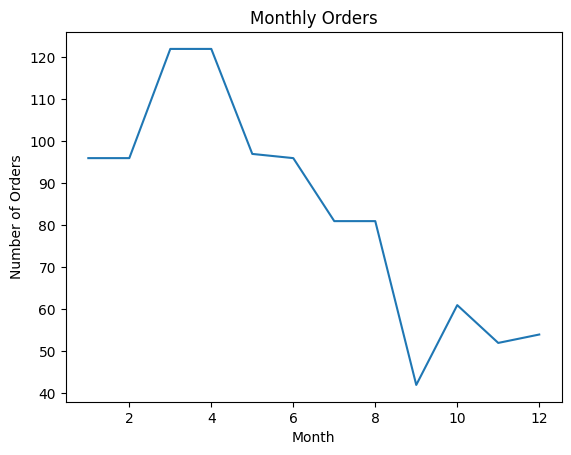

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
df['orderdate'] = pd.to_datetime(df['orderdate'])
df['month']=df['orderdate'].dt.month
monthly_orders=df.groupby('month')['orderid'].count()
print(monthly_orders)
monthly_orders.plot(kind='line',title='Monthly Orders')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.show()


productname
Headphones        223580
Jeans             227694
Chair             277882
Jacket            284696
Cream             292532
Mixer             299179
Smartphone        303941
Football          325377
Laptop            327999
Cricket Bat       331344
Cookware          332475
Smartwatch        336689
Perfume           336915
Magazine          341162
Tennis Racket     348007
Shoes             365370
Shampoo           365514
Novel             377983
Textbook          380664
Gym Bag           385646
Vacuum Cleaner    390197
Lipstick          413591
Comics            422092
T-Shirt           426133
Name: totalamount, dtype: int64


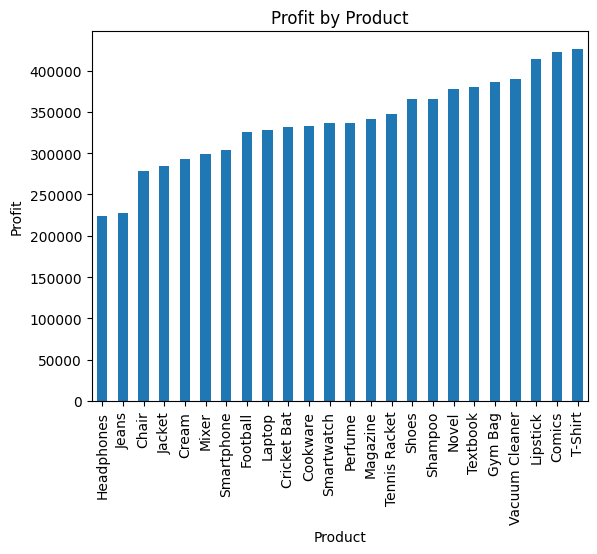

In [7]:
profit_product=df.groupby('productname')['totalamount'].sum().sort_values(ascending=True)
print(profit_product)
profit_product.plot(kind='bar',title='Profit by Product')
plt.xlabel('Product')
plt.ylabel('Profit')
plt.show()

region
South    236
North    244
East     253
West     267
Name: totalamount, dtype: int64


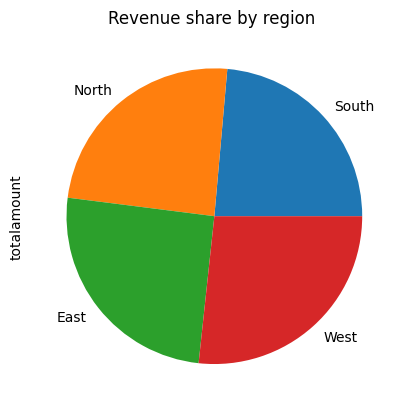

In [8]:
revenue_share_region=df.groupby('region')['totalamount'].count().sort_values(ascending=True)
revenue_share_region.plot(kind='pie',title="Revenue share by region ")
print(revenue_share_region)
plt.show()


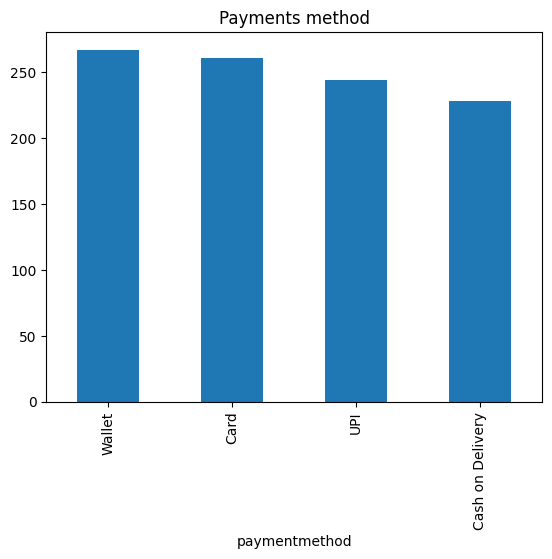

orderstatus       Cancelled  Delivered  Returned
paymentmethod                                   
Card                     83         97        81
Cash on Delivery         77         73        78
UPI                      83         68        93
Wallet                  104         90        73


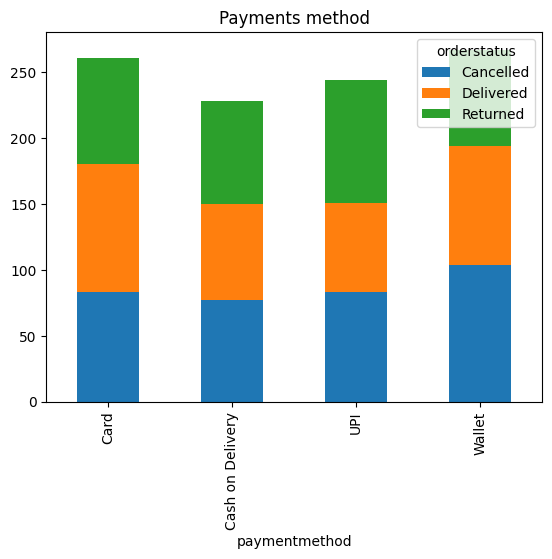

In [9]:
payment_methods=df['paymentmethod'].value_counts()

payment_methods.plot(kind='bar',title='Payments method',stacked=True)
plt.show()
payment_method=df.groupby('paymentmethod')['orderstatus'].value_counts().unstack()
print(payment_method)
payment_method.plot(kind='bar',title='Payments method',stacked=True)
plt.show()

productcategory
Electronics       1192209
Home & Kitchen    1299733
Clothing          1303893
Sports            1390374
Beauty            1408552
Books             1521901
Name: totalamount, dtype: int64


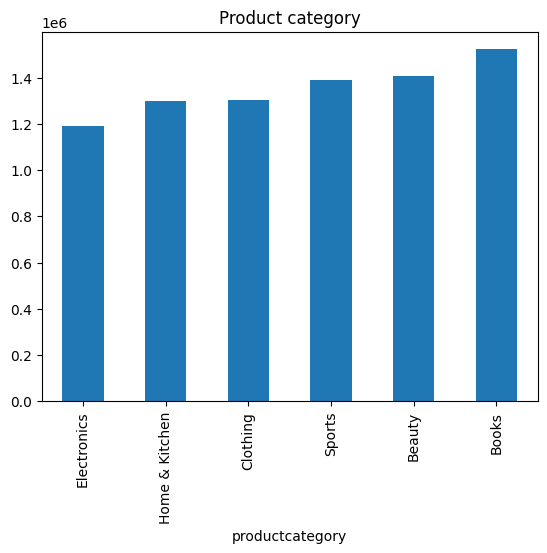

In [10]:
product_category=df.groupby('productcategory')['totalamount'].sum().sort_values(ascending=True)
print(product_category)
product_category.plot(kind='bar',title='Product category',stacked=True)
plt.show()

In [11]:
import sqlite3

# Create an in-memory SQLite database
conn = sqlite3.connect(":memory:")

# Load DataFrame into SQL
df.to_sql("orders", conn, index=False, if_exists="replace")

# Run SQL query
query = """
SELECT Region, SUM(TotalAmount) as Revenue
FROM orders
WHERE OrderStatus = 'Delivered'
GROUP BY Region;
"""
result = pd.read_sql(query, conn)
print(result)


  region  Revenue
0   East   663299
1  North   548544
2  South   661807
3   West   699430


In [13]:
query="""
select productname,totalamount as Revenue
from orders
order by revenue desc
limit 5;
"""
result=pd.read_sql(query,conn)
print(result)

  productname  Revenue
0     T-Shirt    24875
1    Textbook    24660
2     T-Shirt    24615
3       Shoes    24600
4     Shampoo    24585


In [19]:
query="""
select customerid,
sum(totalamount) as revenue_per_customer
from orders
GROUP by customerid
ORDER by revenue_per_customer desc
limit 5 ;
"""
result=pd.read_sql(query,conn)
print(result)

  customerid  revenue_per_customer
0       C235                106479
1       C197                 80392
2       C242                 78110
3       C212                 74686
4       C294                 68045


In [21]:
query="""
select distinct region ,sum(totalamount) as revenue_per_region
from orders
GROUP by region
order by revenue_per_region desc
limit 5;
"""
result=pd.read_sql(query,conn)
print(result)

  region  revenue_per_region
0   East             2066942
1   West             2064116
2  North             2034018
3  South             1951586
